In [665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [666]:
df1=pd.read_csv('DF.csv')
df2=pd.read_csv("prd_nitesh_sir.csv")

In [667]:
df1

,Date,WOR,Month,WOR',Month_
0,1996-11-01 00:00:00,0.000000,0,NaN,0
1,1996-12-01 00:00:00,NaN,1,NaN,1
2,1997-01-01 00:00:00,0.000000,2,0.000000,3
3,1997-02-01 00:00:00,0.000000,3,0.000000,6
4,1997-03-01 00:00:00,0.000000,4,0.000000,10
...,...,...,...,...,...
956,2018-08-01,0.009416,272,1.726614,92321
957,2018-09-01,0.587416,273,1.049717,92594
958,2018-10-01,0.522818,274,1.559022,92868
959,2018-11-01,0.574586,275,1.592430,93143


C:\Users\Abhigyan\AppData\Local\Temp\ipykernel_14016\468732970.py:19: RuntimeWarning: divide by zero encountered in log
  if (wor_range[0] <= np.log(wor) <= wor_range[1] and


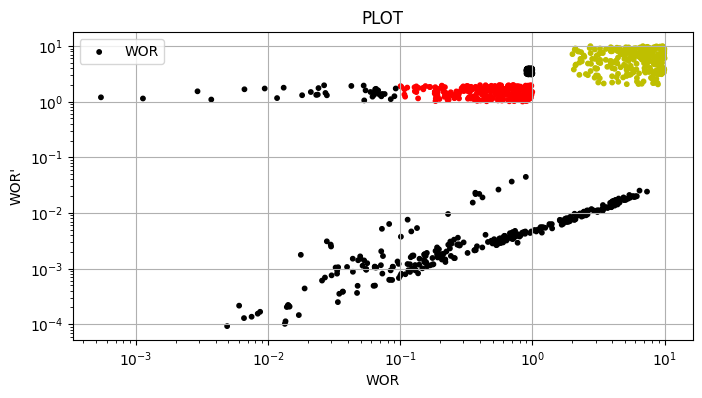

In [668]:
patterns = {
    'Constant WOR': {'WOR': (np.log(0.1), np.log(1)), "WOR'": (np.log(1), np.log(2))},
    'Normal Displacement': {'WOR': (np.log(1), np.log(1)), "WOR'": (np.log(1), np.log(3))},
    'Multilayer Channeling': {'WOR': (np.log(1), np.log(2)), "WOR'": (np.log(3), np.log(10))},
    'Rapid Channeling': {'WOR': (np.log(2), np.log(10)), "WOR'": (np.log(2), np.log(10))}
}

point_patterns = []

for index, row in df1.iterrows():
    wor = row['WOR']
    wor_prime = row["WOR'"]

    pattern_matched = None
    for pattern_name, criteria in patterns.items():
        wor_range = criteria['WOR']
        wor_prime_range = criteria["WOR'"]
        
        if (wor_range[0] <= np.log(wor) <= wor_range[1] and
            wor_prime_range[0] <= np.log(wor_prime) <= wor_prime_range[1]):
            pattern_matched = pattern_name
            break  # Exit the loop once a pattern is found
    
    point_patterns.append(pattern_matched)

pattern_colors = {
    'Constant WOR': 'r',
    'Normal Displacement': 'g',
    'Multilayer Channeling': 'b',
    'Rapid Channeling': 'y'
}

point_colors = [pattern_colors.get(pattern, 'k') for pattern in point_patterns]

# Plot the points with colors
plt.figure(figsize=(8, 4))
plt.scatter(df1['WOR'], df1["WOR'"], label='WOR', c=point_colors, marker='o', s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('WOR')
plt.ylabel("WOR'")
plt.legend()
plt.title('PLOT')
plt.grid(True)
plt.show()

In [669]:
pattern_found = []

for index, row in df1.iloc[:-1].iterrows():
    wor_diff = abs(row['WOR'] - df1.at[index + 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df1.at[index + 1, "WOR'"])
    
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1] and
            wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break    
    if not pattern_matched:
        pattern_found.append(None)

pattern_found.append(None)

df1.reset_index(drop=True, inplace=True)

df1['Pattern'] = pattern_found

# Creating separate DataFrames for each identified pattern
pattern_dataframes = {}
for pattern_name in patterns.keys():
    pattern_dataframes[pattern_name] = df1[df1['Pattern'] == pattern_name].copy()

In [670]:
df1

,Date,WOR,Month,WOR',Month_,Pattern
0,1996-11-01 00:00:00,0.000000,0,NaN,0,None
1,1996-12-01 00:00:00,NaN,1,NaN,1,None
2,1997-01-01 00:00:00,0.000000,2,0.000000,3,Constant WOR
3,1997-02-01 00:00:00,0.000000,3,0.000000,6,Constant WOR
4,1997-03-01 00:00:00,0.000000,4,0.000000,10,Constant WOR
...,...,...,...,...,...,...
956,2018-08-01,0.009416,272,1.726614,92321,None
957,2018-09-01,0.587416,273,1.049717,92594,None
958,2018-10-01,0.522818,274,1.559022,92868,None
959,2018-11-01,0.574586,275,1.592430,93143,None


In [671]:
df1.columns

Index(['Date', 'WOR', 'Month', 'WOR'', 'Month_', 'Pattern'], dtype='object')

In [672]:
df1=df1.drop(columns=['Date','Month'])

In [673]:
df2

,F/days,Oil,Water,Gas,Date,Month,WOR,Month_,WOR',Pattern
0,31.0,1341.600000,0.000,36491.5,1981-07-31,1,0.000000,1,0.000000,Constant WOR
1,31.0,1344.600000,0.000,50422.5,1981-08-31,2,0.000000,3,0.000000,Constant WOR
2,30.0,2003.800000,0.000,53701.8,1981-09-30,3,0.000000,6,0.000000,Constant WOR
3,31.0,1955.300000,0.000,52597.6,1981-10-31,4,0.000000,10,0.000000,Constant WOR
4,30.0,1786.800000,0.000,50209.1,1981-11-30,5,0.000000,15,0.000000,Constant WOR
...,...,...,...,...,...,...,...,...,...,...
1476,30.0,915.956061,42.424,25831.0,2023-09-30,507,0.046317,516357,0.000091,NaN
1477,30.0,108.119536,94.481,23922.0,2023-09-30,507,0.873857,517371,0.001724,NaN
1478,31.0,25.272647,33.832,0.0,2023-10-31,508,1.338681,518895,0.002635,NaN
1479,31.0,980.830036,55.397,19023.0,2023-10-31,508,0.056480,519403,0.000111,NaN


In [674]:
df2.columns

Index(['F/days', 'Oil', 'Water', 'Gas', 'Date', 'Month', 'WOR', 'Month_',
       'WOR'', 'Pattern'],
      dtype='object')

In [675]:
df2=df2.drop(columns=['F/days', 'Gas', 'Date', 'Oil', 'Water','Month'])

In [676]:
df=pd.concat([df1,df2])

In [677]:
df

,WOR,WOR',Month_,Pattern
0,0.000000,NaN,0,None
1,NaN,NaN,1,None
2,0.000000,0.000000,3,Constant WOR
3,0.000000,0.000000,6,Constant WOR
4,0.000000,0.000000,10,Constant WOR
...,...,...,...,...
1476,0.046317,0.000091,516357,NaN
1477,0.873857,0.001724,517371,NaN
1478,1.338681,0.002635,518895,NaN
1479,0.056480,0.000111,519403,NaN


In [678]:
df.dtypes

WOR        float64
WOR'       float64
Month_       int64
Pattern     object
dtype: object

In [679]:
df['Pattern'].nunique()

3

In [680]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Pattern_encoded'] = label_encoder.fit_transform(df['Pattern'])


In [681]:
encoded_data = pd.get_dummies(df, columns=['Pattern'], prefix='Pattern')


In [682]:
df

,WOR,WOR',Month_,Pattern,Pattern_encoded
0,0.000000,NaN,0,None,3
1,NaN,NaN,1,None,3
2,0.000000,0.000000,3,Constant WOR,0
3,0.000000,0.000000,6,Constant WOR,0
4,0.000000,0.000000,10,Constant WOR,0
...,...,...,...,...,...
1476,0.046317,0.000091,516357,NaN,4
1477,0.873857,0.001724,517371,NaN,4
1478,1.338681,0.002635,518895,NaN,4
1479,0.056480,0.000111,519403,NaN,4


In [683]:
df.dtypes

WOR                float64
WOR'               float64
Month_               int64
Pattern             object
Pattern_encoded      int32
dtype: object

In [684]:
df=df.dropna()

## Modelling

In [685]:
X = df[['Month_', 'WOR', "WOR'"]]
Y = df['Pattern_encoded']

#### LInear CLassification

In [686]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [687]:
threshold_value = 0.5

In [688]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [689]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [690]:
y_pred = linear_reg.predict(X_test)

In [691]:
y_pred_class = [1 if pred >= threshold_value else 0 for pred in y_pred]

In [692]:
from sklearn.metrics import accuracy_score, classification_report

In [693]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred_class))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.42      1.00      0.59         5
           2       0.00      0.00      0.00         7

    accuracy                           0.79        33
   macro avg       0.47      0.67      0.53        33
weighted avg       0.70      0.79      0.73        33



c:\Users\Abhigyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abhigyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Abhigyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

#### SVM

In [694]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [696]:
scaler = StandardScaler()

In [697]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [698]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [699]:
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [700]:
y_pred = svm.predict(X_test_scaled)

In [701]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.20      0.33         5
           2       0.60      0.86      0.71         7

    accuracy                           0.85        33
   macro avg       0.85      0.69      0.67        33
weighted avg       0.89      0.85      0.82        33



#### Logistic 

In [702]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [703]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [704]:
scaler = StandardScaler()

In [705]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [706]:
log_reg = LogisticRegression(random_state=42)

In [707]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [708]:
y_pred = log_reg.predict(X_test_scaled)

In [709]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.60      0.75         5
           2       0.60      0.43      0.50         7

    accuracy                           0.82        33
   macro avg       0.81      0.68      0.72        33
weighted avg       0.81      0.82      0.80        33



#### Decision Tree

In [710]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [711]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [712]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [713]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [714]:
y_pred = decision_tree.predict(X_test)

In [715]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.80      0.80      0.80         5
           2       0.86      0.86      0.86         7

    accuracy                           0.94        33
   macro avg       0.89      0.89      0.89        33
weighted avg       0.94      0.94      0.94        33



#### Random Forrest

In [716]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [718]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [719]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [720]:
y_pred = random_forest.predict(X_test)

In [721]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.60      0.75         5
           2       0.78      1.00      0.88         7

    accuracy                           0.94        33
   macro avg       0.93      0.87      0.88        33
weighted avg       0.95      0.94      0.94        33



#### XG BOOST

In [722]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [724]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [725]:
params = {
    'objective': 'multi:softmax',  
    'num_class': len(Y.unique()),  
    'seed': 42
}

In [726]:
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

In [727]:
y_pred = xgb_model.predict(dtest)
y_pred

array([0., 0., 0., 2., 0., 2., 0., 1., 0., 0., 2., 0., 1., 0., 2., 2., 0.,
       0., 0., 2., 0., 1., 2., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [728]:
y_pred = y_pred.astype(int)
y_pred

array([0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [729]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.80      0.89         5
           2       0.88      1.00      0.93         7

    accuracy                           0.97        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.97      0.97      0.97        33



##### Blind Data

In [730]:
df3=pd.read_csv("Tutorial-4.csv")
df4 = pd.read_excel('Book2.xlsx')
df5= pd.read_excel('Book3.xlsx')

In [731]:
df3

,Date,MONTHLY PRODUCTION DAYS,MONTHLY WATER [m³],MONTHLY OIL [m³]
0,12/1/2009,26,8.5,936.7
1,1/1/2010,31,107.3,266.6
2,2/1/2010,26,77.1,318.4
3,3/1/2010,31,68.1,540.0
4,4/1/2010,20,28.1,207.9
...,...,...,...,...
70,10/1/2015,30,66.0,66.0
71,11/1/2015,27,123.4,100.5
72,12/1/2015,31,114.9,177.3
73,1/1/2016,31,100.1,153.9


In [732]:
df3.columns

Index(['      Date ', 'MONTHLY PRODUCTION DAYS      ',
       'MONTHLY WATER [m³]    ', 'MONTHLY OIL [m³]    '],
      dtype='object')

In [733]:
df3['WOR']=df3['MONTHLY WATER [m³]    ']/df3['MONTHLY OIL [m³]    ']

In [734]:
df3['Date']=df3['      Date ']
df3 = df3.drop(columns='      Date ')

In [735]:
df3['Date'] = pd.to_datetime(df3['Date'], format='%m/%d/%Y')
df3['Month'] = (df3['Date'].dt.year - df3['Date'].dt.year.min()) * 12 + df3['Date'].dt.month - 11 

In [736]:
df3["WOR'"]=df3['WOR']/df3['Month']

In [737]:
df3['Month_'] = df3['Month'].cumsum()

In [738]:
df4

,Date,MONTHLY PRODUCTION DAYS,MONTHLY WATER [m³],MONTHLY OIL [m³]
0,2006-03-01,17,0.0,838.7
1,2006-04-01,30,30.5,1575.0
2,2006-05-01,31,20.1,1992.0
3,2006-06-01,30,19.6,1937.2
4,2006-07-01,31,20.2,1995.5
...,...,...,...,...
115,2015-10-01,31,1929.1,476.4
116,2015-11-01,30,1730.5,595.1
117,2015-12-01,31,1908.8,426.3
118,2016-01-01,31,1911.2,408.6


In [739]:
df4['WOR']=df4['MONTHLY WATER [m³]    ']/df4['MONTHLY WATER [m³]    ']

In [740]:
df4['Date']=df4['      Date ']
df4 = df4.drop(columns='      Date ')

In [741]:
df4['Date'] = pd.to_datetime(df4['Date'], format='%m/%d/%Y')
df4['Month'] = (df4['Date'].dt.year - df4['Date'].dt.year.min()) * 12 + df4['Date'].dt.month - 2

In [742]:
df4["WOR'"]=df4['WOR']/df4['Month']

In [743]:
df4['Month_'] = df4['Month'].cumsum()

In [744]:
df4

,MONTHLY PRODUCTION DAYS,MONTHLY WATER [m³],MONTHLY OIL [m³],WOR,Date,Month,WOR',Month_
0,17,0.0,838.7,NaN,2006-03-01,1,NaN,1
1,30,30.5,1575.0,1.0,2006-04-01,2,0.500000,3
2,31,20.1,1992.0,1.0,2006-05-01,3,0.333333,6
3,30,19.6,1937.2,1.0,2006-06-01,4,0.250000,10
4,31,20.2,1995.5,1.0,2006-07-01,5,0.200000,15
...,...,...,...,...,...,...,...,...
115,31,1929.1,476.4,1.0,2015-10-01,116,0.008621,6786
116,30,1730.5,595.1,1.0,2015-11-01,117,0.008547,6903
117,31,1908.8,426.3,1.0,2015-12-01,118,0.008475,7021
118,31,1911.2,408.6,1.0,2016-01-01,119,0.008403,7140


In [745]:
df5

,Date,MONTHLY PRODUCTION DAYS,MONTHLY WATER [m³],MONTHLY OIL [m³]
0,2005-08-01,10,50.7,598.8
1,2005-09-01,10,50.7,598.8
2,2005-10-01,23,0.0,1281.7
3,2005-11-01,30,0.0,1984.0
4,2005-12-01,31,170.1,3978.6
...,...,...,...,...
122,2015-10-01,20,767.1,0.0
123,2015-11-01,20,720.9,96.5
124,2015-12-01,31,1050.5,121.7
125,2016-01-01,31,1016.6,115.6


In [746]:
df5['WOR']=df5['MONTHLY WATER [m³]    ']/df5['MONTHLY WATER [m³]    ']

In [747]:
df5['Date']=df5['      Date ']
df5 = df5.drop(columns='      Date ')

In [748]:
df5['Date'] = pd.to_datetime(df5['Date'], format='%m/%d/%Y')
df5['Month'] = (df5['Date'].dt.year - df5['Date'].dt.year.min()) * 12 + df5['Date'].dt.month - 7

In [749]:
df5["WOR'"]=df5['WOR']/df5['Month']

In [750]:
df5['Month_'] = df5['Month'].cumsum()

In [751]:
df6=pd.concat([df3,df4,df5])

In [752]:
df6

,MONTHLY PRODUCTION DAYS,MONTHLY WATER [m³],MONTHLY OIL [m³],WOR,Date,Month,WOR',Month_
0,26,8.5,936.7,0.009074,2009-12-01,1,0.009074,1
1,31,107.3,266.6,0.402476,2010-01-01,2,0.201238,3
2,26,77.1,318.4,0.242148,2010-02-01,3,0.080716,6
3,31,68.1,540.0,0.126111,2010-03-01,4,0.031528,10
4,20,28.1,207.9,0.135161,2010-04-01,5,0.027032,15
...,...,...,...,...,...,...,...,...
122,20,767.1,0.0,1.000000,2015-10-01,123,0.008130,7626
123,20,720.9,96.5,1.000000,2015-11-01,124,0.008065,7750
124,31,1050.5,121.7,1.000000,2015-12-01,125,0.008000,7875
125,31,1016.6,115.6,1.000000,2016-01-01,126,0.007937,8001


In [753]:
df6.columns

Index(['MONTHLY PRODUCTION DAYS      ', 'MONTHLY WATER [m³]    ',
       'MONTHLY OIL [m³]    ', 'WOR', 'Date', 'Month', 'WOR'', 'Month_'],
      dtype='object')

In [754]:
df6=df6.drop(columns=['MONTHLY PRODUCTION DAYS      ', 'MONTHLY WATER [m³]    ','MONTHLY OIL [m³]    ','Date', 'Month'])

In [755]:
df6

,WOR,WOR',Month_
0,0.009074,0.009074,1
1,0.402476,0.201238,3
2,0.242148,0.080716,6
3,0.126111,0.031528,10
4,0.135161,0.027032,15
...,...,...,...
122,1.000000,0.008130,7626
123,1.000000,0.008065,7750
124,1.000000,0.008000,7875
125,1.000000,0.007937,8001


In [756]:
df6.reset_index(drop=True, inplace=True)

In [757]:
pattern_found = []

for index, row in df6.iloc[:-1].iterrows():
    wor_diff = abs(row['WOR'] - df6.at[index + 1, 'WOR'])
    wor_prime_diff = abs(row["WOR'"] - df6.at[index + 1, "WOR'"])    
    pattern_matched = False
    for pattern_name, criteria in patterns.items():
        wor_diff_range = criteria['WOR']
        wor_prime_diff_range = criteria["WOR'"]
        
        if (wor_diff_range[0] <= wor_diff <= wor_diff_range[1]) and \
           (wor_prime_diff_range[0] <= wor_prime_diff <= wor_prime_diff_range[1]):
            pattern_found.append(pattern_name)
            pattern_matched = True
            break    
    if not pattern_matched:
        pattern_found.append(None)

pattern_found.append(None)
df6.reset_index(drop=True, inplace=True)
df6['Pattern'] = pattern_found
pattern_dataframes = {}
for pattern_name in patterns.keys():
    pattern_dataframes[pattern_name] = df6[df6['Pattern'] == pattern_name].copy()


In [758]:
df6

,WOR,WOR',Month_,Pattern
0,0.009074,0.009074,1,None
1,0.402476,0.201238,3,None
2,0.242148,0.080716,6,None
3,0.126111,0.031528,10,None
4,0.135161,0.027032,15,None
...,...,...,...,...
317,1.000000,0.008130,7626,Constant WOR
318,1.000000,0.008065,7750,Constant WOR
319,1.000000,0.008000,7875,Constant WOR
320,1.000000,0.007937,8001,Constant WOR


In [759]:
df6.to_csv('df6.csv', index=False)

In [760]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df6['Pattern_encoded'] = label_encoder.fit_transform(df6['Pattern'])

Test

In [761]:
# window_size = 3
# df6['WOR_Rolling_Mean'] = df6['WOR'].rolling(window=window_size).mean()
# df6['Month_Rolling_Mean'] = df6['Month_'].rolling(window=window_size).mean()

In [762]:
# blind_X = df6[['Month_', 'WOR', "WOR'", 'WOR_Rolling_Mean', 'Month_Rolling_Mean']]

In [763]:
blind_X = df6[['Month_', 'WOR', "WOR'"]]

In [764]:
blind_Y=df6[['Pattern_encoded']]

In [765]:
blind_X

,Month_,WOR,WOR'
0,1,0.009074,0.009074
1,3,0.402476,0.201238
2,6,0.242148,0.080716
3,10,0.126111,0.031528
4,15,0.135161,0.027032
...,...,...,...
317,7626,1.000000,0.008130
318,7750,1.000000,0.008065
319,7875,1.000000,0.008000
320,8001,1.000000,0.007937


In [766]:
dmatrix = xgb.DMatrix(data=blind_X)
y_pred1 = xgb_model.predict(dmatrix)

In [767]:
print(y_pred1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [768]:
dblind = xgb.DMatrix(blind_X)

In [769]:
accuracy = accuracy_score(y_pred1, blind_Y)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_pred1, blind_Y))

Accuracy: 0.70
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83       320
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.70       322
   macro avg       0.33      0.24      0.28       322
weighted avg       0.99      0.70      0.82       322



### Hyperparameter

In [781]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [782]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.3],
}

In [783]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [784]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

In [786]:
grid_search.fit(X, Y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=4, n_estimators=50; total

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [787]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.9090909090909091
